In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.nn import rnn_cell,dynamic_rnn
import matplotlib.pyplot as plt

In [54]:
def reset_graph(seed=92):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [55]:
reset_graph()

n_step = 28
n_input = 28
n_neurons = 120
n_outputs=10

lr=0.0001

X=tf.placeholder(tf.float32,[None,n_step,n_input])
y=tf.placeholder(tf.int32,[None])

# rnn_cell=tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

lstm_cell=rnn_cell.LSTMCell(num_units=n_neurons)
# lstm_cell=tf.contrib.rnn.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(lstm_cell, X, dtype=tf.float32)
logits = tf.layers.dense(states[1], n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=lr)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [56]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [57]:
mnist = input_data.read_data_sets("/tmp/data/")
X_test = mnist.test.images.reshape((-1, n_step, n_input))
y_test = mnist.test.labels

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [59]:
n_epochs = 20
batch_size = 100

train_acc=[]
test_acc=[]
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for batch in range(len(mnist.train.images)//batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            X_batch = X_batch.reshape((-1, n_step, n_input))
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        #train and test accuracy for every epoch
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        train_acc.append(acc_train)
        test_acc.append(acc_test)
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.72 Test accuracy: 0.8027
1 Train accuracy: 0.88 Test accuracy: 0.8918
2 Train accuracy: 0.92 Test accuracy: 0.9197
3 Train accuracy: 0.93 Test accuracy: 0.9337
4 Train accuracy: 0.95 Test accuracy: 0.9425
5 Train accuracy: 0.96 Test accuracy: 0.9483
6 Train accuracy: 0.93 Test accuracy: 0.953
7 Train accuracy: 0.97 Test accuracy: 0.9528
8 Train accuracy: 0.96 Test accuracy: 0.9599
9 Train accuracy: 0.97 Test accuracy: 0.9616
10 Train accuracy: 0.96 Test accuracy: 0.9614
11 Train accuracy: 1.0 Test accuracy: 0.9622
12 Train accuracy: 0.98 Test accuracy: 0.9647
13 Train accuracy: 0.94 Test accuracy: 0.9658
14 Train accuracy: 0.99 Test accuracy: 0.9682
15 Train accuracy: 0.99 Test accuracy: 0.9665
16 Train accuracy: 0.99 Test accuracy: 0.9685
17 Train accuracy: 1.0 Test accuracy: 0.9693
18 Train accuracy: 1.0 Test accuracy: 0.9665
19 Train accuracy: 1.0 Test accuracy: 0.9725


Text(0,0.5,'accuracy')

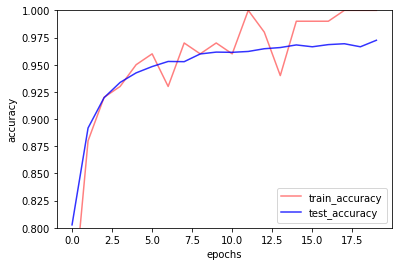

In [60]:
plt.plot(train_acc,color='r',label='train_accuracy',alpha=0.5)
plt.plot(test_acc,color='b',label='test_accuracy',alpha=0.8)
plt.ylim(0.8,1)
plt.legend(loc='lower right')
plt.xlabel('epochs')
plt.ylabel('accuracy')